In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# Create Pandas timeseries

In [2]:
datain = pd.read_csv("datasets/csv4.csv")
datain['Date'] = pd.to_datetime(datain['Date'])
datalist = datain['Value'].to_numpy()
dsize = datalist.size

In [3]:
series = pd.Series(datain['Value'][1:].values, datain['Date'][1:].values).asfreq('H')
series

2021-10-28 14:29:00    11.2
2021-10-28 15:29:00    10.8
2021-10-28 16:29:00    10.8
2021-10-28 17:29:00    10.5
2021-10-28 18:29:00    10.3
                       ... 
2021-11-20 15:29:00     6.0
2021-11-20 16:29:00     6.4
2021-11-20 17:29:00     5.2
2021-11-20 18:29:00     4.6
2021-11-20 19:29:00     4.3
Freq: H, Length: 558, dtype: float64

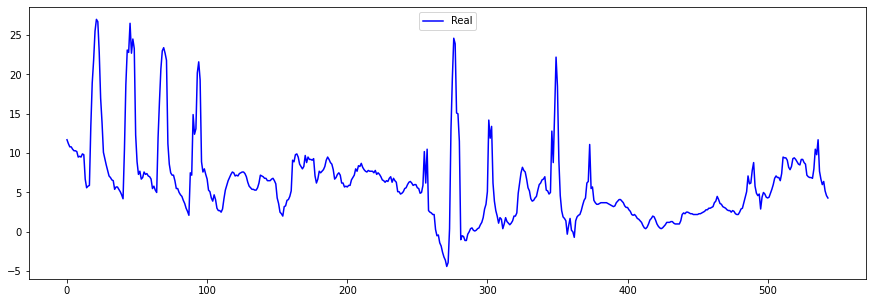

In [4]:
x_axis = np.arange(dsize)
plt.figure(figsize=(15,5))
plt.plot(x_axis, datalist, color="b", label="Real")
plt.legend(loc=9)

In [88]:
model = ARIMA(series, order=(50, 0, 0), trend="n")
results = model.fit()

C:\Users\Huan.Le\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  558
Model:                ARIMA(50, 0, 0)   Log Likelihood               -1038.024
Date:                Tue, 24 May 2022   AIC                           2178.049
Time:                        10:09:52   BIC                           2398.591
Sample:                    10-28-2021   HQIC                          2264.178
                         - 11-20-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0070      0.029     34.426      0.000       0.950       1.064
ar.L2         -0.0920      0.043     -2.141      0.032      -0.176      -0.008
ar.L3         -0.0455      0.049     -0.936      0.349      -0.141       0.050
ar.L4         -0.0462      0.054     -0.856      0.392      -0.152       0.060
ar.L5          0.0892      0.063      1.408      0.159      -0.035       0.213
ar.L6         -0.1477      0.066     -2.249      0.025      -0.276      -0.019
ar.L7          0.0123      0.078      0.158      0.875      -0.141       0.165
ar.L8          0.0274      0.083      0.331      0.741      -0.135       0.190
ar.L9          0.0501      0.101      0.497      0.620      -0.148       0.248
ar.L10         0.0267      0.108      0.247      0.805      -0.185       0.238
ar.L11        -0.0512      0.115     -0.445      0.656      -0.277       0.174
ar.L12        -0.0130      0.112     -0.116      0.908      -0.232       0.206
ar.L13         0.0001      0.091      0.001      0.999      -0.178       0.178
ar.L14         0.0115      0.103      0.111      0.912      -0.191       0.214
ar.L15         0.0432      0.092      0.469      0.639      -0.137       0.224
ar.L16        -0.0671      0.095     -0.706      0.480      -0.253       0.119
ar.L17         0.0298      0.071      0.419      0.675      -0.110       0.170
ar.L18         0.0317      0.056      0.562      0.574      -0.079       0.142
ar.L19        -0.0183      0.058     -0.312      0.755      -0.133       0.096
ar.L20        -0.0317      0.061     -0.524      0.600      -0.151       0.087
ar.L21         0.0849      0.067      1.276      0.202      -0.046       0.215
ar.L22        -0.0646      0.066     -0.985      0.325      -0.193       0.064
ar.L23         0.1825      0.058      3.134      0.002       0.068       0.297
ar.L24         0.1190      0.053      2.248      0.025       0.015       0.223
ar.L25        -0.2700      0.049     -5.493      0.000      -0.366      -0.174
ar.L26         0.1502      0.058      2.581      0.010       0.036       0.264
ar.L27         0.0524      0.059      0.890      0.374      -0.063       0.168
ar.L28        -0.1343      0.063     -2.115      0.034      -0.259      -0.010
ar.L29         0.0444      0.068      0.651      0.515      -0.089       0.178
ar.L30         0.0530      0.085      0.625      0.532      -0.113       0.219
ar.L31        -0.0475      0.099     -0.480      0.631      -0.241       0.146
ar.L32        -0.0325      0.102     -0.319      0.749      -0.232       0.167
ar.L33         0.1095      0.111      0.986      0.324      -0.108       0.327
ar.L34        -0.0611      0.135     -0.453      0.651      -0.326       0.204
ar.L35         0.0241      0.130      0.185      0.853      -0.231       0.279
ar.L36        -0.0224      0.131     -0.172      0.864      -0.279       0.234
ar.L37         0.0315      0.129      0.243      0.808      -0.222       0.285
ar.L38        -0.0672      0.129     -0.521      0.603      -0.320       0.186
ar

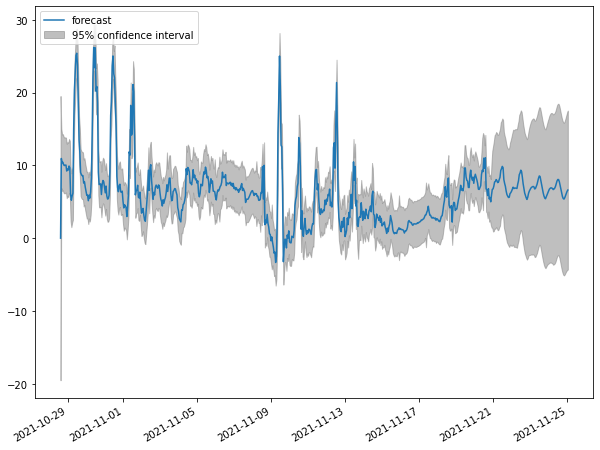

In [90]:
fig, ax = plt.subplots(figsize=(10, 8))
fig = plot_predict(results, end='2021-11-25', ax=ax)
legend = ax.legend(loc="upper left")